<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Delhi/bjpDelhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 620 (delta 92), reused 0 (delta 0), pack-reused 415
Receiving objects: 100% (620/620), 31.00 MiB | 11.34 MiB/s, done.
Resolving deltas: 100% (259/259), done.


In [3]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"bjp Delhi"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('bjp_delhi.csv',index = False)

Streaming output truncated to the last 5000 lines.
<--------------------------------------------------->
1806
2020-11-16 12:58:16
1328321490404536320
True
#NewsAlert – The situation in Delhi is alarming and this is why the center had to intervene. The central Government have chalked out a 12 point plan to counter the Covid-19 cases, the Delhi Government never gave a heed: BJP Leader, @Rajan_Tewari tells @Zakka_Jacob on #Viewpoint. https://t.co/VGD5dTAv1i
CNNnews18
India
Twitter Media Studio - LiveCut
14
4545115
415
3
<--------------------------------------------------->
1807
2020-11-16 12:57:46
1328321362247573506
True
BJP national general secretary and former Karnataka minister CT Ravi demanded that Delhi's Jawaharlal Nehru University (JNU) be renamed as Swami Vivekananda University.

https://t.co/MBEtrFB8BF
news18dotcom
India
TweetDeck
6
149175
181
0
<--------------------------------------------------->
1808
2020-11-16 12:54:53
1328320636951822337
False
Congress Parrot List: CBI

BJP

In [4]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2165 non-null   datetime64[ns]
 1   Tweet_id   2165 non-null   int64         
 2   Verified   2165 non-null   bool          
 3   Tweet      2165 non-null   object        
 4   User       2165 non-null   object        
 5   Location   2165 non-null   object        
 6   Source     2165 non-null   object        
 7   Likes      2165 non-null   int64         
 8   Followers  2165 non-null   int64         
 9   Following  2165 non-null   int64         
 10  Retweets   2165 non-null   int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 171.4+ KB


In [6]:
df.shape

(2165, 11)

In [7]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [8]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [9]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [10]:
df['Source'].value_counts()

Twitter for Android               1115
Twitter Web App                    569
Twitter for iPhone                 288
TweetDeck                           46
Twitter Media Studio - LiveCut      34
IFTTT                               21
Twitter for iPad                    16
cmssocialservice                     9
Twitter Media Studio                 9
WordPress.com                        8
ht-twitter-handler                   5
Buffer                               4
Tweet Suite                          4
Periscope                            4
Rajneeti News                        4
dlvr.it                              4
Republicworld                        3
Hootsuite Inc.                       3
Devdiscourse News Desk               3
Hocalwire Social Share               2
garda-security-alerts                1
econ b2b post                        1
Mobile Web (M2)                      1
The Tweeted Times                    1
namPublisher                         1
ContentStudio.io         

In [11]:
df['Location'].nunique()

541

In [12]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

2165

In [13]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


2158

In [14]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [15]:
df['Tweet'].duplicated().sum()

7

In [16]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(2158, 11)

In [17]:
df['Tweet'].duplicated().sum()

0

In [18]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [19]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [20]:
df.shape

(2158, 12)

In [21]:
df['Processed_Tweet']

0       #INC+RG do not know ppl luv BJP \n#Demo+GDP+un...
1       @UNTGAPS @varunsankineni @vivekvenkatswam @tea...
2       @praveesh123 @varunsankineni @vivekvenkatswam ...
3       @TimesNow @Dev_Fadnavis After that we will dec...
4       @Seems3r AAP supporters IQ and BJP Delhi leade...
                              ...                        
2153        @navikakumar Gr8 strategic move by BJP, Delhi
2154    @Rita_Blogs @UturnSarkar @akhlaquequmar35 @sid...
2155    #BREAKING: BJP to have 2 Deputy Chief Minister...
2156    Harsh Vardhan should be Delhi CM candidate fro...
2157    From Horse mouth. Failed CM of Delhi who could...
Name: Processed_Tweet, Length: 2158, dtype: object

In [22]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0       #INC+RG do not know ppl luv BJP \n#Demo+GDP+un...
1       @UNTGAPS @varunsankineni @vivekvenkatswam @tea...
2       @praveesh123 @varunsankineni @vivekvenkatswam ...
3       @TimesNow @Dev_Fadnavis After that we will dec...
4       @Seems3r AAP supporters IQ and BJP Delhi leade...
                              ...                        
2153        @navikakumar Gr8 strategic move by BJP, Delhi
2154    @Rita_Blogs @UturnSarkar @akhlaquequmar35 @sid...
2155    #BREAKING: BJP to have 2 Deputy Chief Minister...
2156    Harsh Vardhan should be Delhi CM candidate fro...
2157    From Horse mouth. Failed CM of Delhi who could...
Name: Processed_Tweet, Length: 2158, dtype: object

In [23]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0       #INC+RG do not know ppl luv BJP \n#Demo+GDP+un...
1                                                     ...
2                                               https:...
3           After that we will declassify   real age. ...
4         AAP supporters IQ and BJP Delhi leaders effo...
                              ...                        
2153                     Gr8 strategic move by BJP, Delhi
2154            Ye twitter pe likhne se nhi hota hai c...
2155    #BREAKING: BJP to have 2 Deputy Chief Minister...
2156    Harsh Vardhan should be Delhi CM candidate fro...
2157    From Horse mouth. Failed CM of Delhi who could...
Name: Processed_Tweet, Length: 2158, dtype: object

In [24]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0       #INC+RG do not know ppl luv BJP \n#Demo+GDP+un...
1                                                     ...
2                                               \n\n#B...
3           After that we will declassify   real age. ...
4         AAP supporters IQ and BJP Delhi leaders effo...
                              ...                        
2153                     Gr8 strategic move by BJP, Delhi
2154            Ye twitter pe likhne se nhi hota hai c...
2155    #BREAKING: BJP to have 2 Deputy Chief Minister...
2156    Harsh Vardhan should be Delhi CM candidate fro...
2157    From Horse mouth. Failed CM of Delhi who could...
Name: Processed_Tweet, Length: 2158, dtype: object

In [25]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0       INC+RG do not know ppl luv BJP \nDemo+GDP+unem...
1                                                     ...
2                                               \n\nBJ...
3           After that we will declassify   real age. ...
4         AAP supporters IQ and BJP Delhi leaders effo...
                              ...                        
2153                     Gr8 strategic move by BJP, Delhi
2154            Ye twitter pe likhne se nhi hota hai c...
2155    BREAKING: BJP to have 2 Deputy Chief Ministers...
2156    Harsh Vardhan should be Delhi CM candidate fro...
2157    From Horse mouth. Failed CM of Delhi who could...
Name: Processed_Tweet, Length: 2158, dtype: object

In [26]:
!pip install tweet-preprocessor

In [27]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0       INC+RG do not know ppl luv BJP Demo+GDP+unempC...
1       IIT graduate is CM of Delhi right...Ask him to...
2       BJP are making huge corruption in Delhi MCD? D...
3       After that we will declassify real age. shahid...
4       AAP supporters IQ and BJP Delhi leaders effort...
                              ...                        
2153                     Gr8 strategic move by BJP, Delhi
2154    Ye twitter pe likhne se nhi hota hai congress ...
2155    BREAKING: BJP to have Deputy Chief Ministers i...
2156    Harsh Vardhan should be Delhi CM candidate fro...
2157    From Horse mouth. Failed CM of Delhi who could...
Name: Processed_Tweet, Length: 2158, dtype: object

In [28]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0       INC RG do not know ppl luv BJP Demo GDP unempC...
1       IIT graduate is CM of Delhi right   Ask him to...
2       BJP are making huge corruption in Delhi MCD  D...
3       After that we will declassify real age  shahid...
4       AAP supporters IQ and BJP Delhi leaders effort...
                              ...                        
2153                     Gr  strategic move by BJP  Delhi
2154    Ye twitter pe likhne se nhi hota hai congress ...
2155    BREAKING  BJP to have Deputy Chief Ministers i...
2156    Harsh Vardhan should be Delhi CM candidate fro...
2157    From Horse mouth  Failed CM of Delhi who could...
Name: Processed_Tweet, Length: 2158, dtype: object

In [29]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0       inc rg do not know ppl luv bjp demo gdp unempc...
1       iit graduate is cm of delhi right   ask him to...
2       bjp are making huge corruption in delhi mcd  d...
3       after that we will declassify real age  shahid...
4       aap supporters iq and bjp delhi leaders effort...
                              ...                        
2153                     gr  strategic move by bjp  delhi
2154    ye twitter pe likhne se nhi hota hai congress ...
2155    breaking  bjp to have deputy chief ministers i...
2156    harsh vardhan should be delhi cm candidate fro...
2157    from horse mouth  failed cm of delhi who could...
Name: Processed_Tweet, Length: 2158, dtype: object

In [30]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'i was in tn for one week and i can say with confidence that bjp is gaining ground there    '

In [31]:
df['User'].value_counts()

Mystic_Soul25      28
Delhi_Bjp_         21
CommonMan_oB91     20
Tiger_UdaySingh    14
CNNnews18          14
                   ..
tvocal_In           1
krishna76_h         1
ShahabJafri55       1
Sisirkumardatt3     1
nkk_123             1
Name: User, Length: 1633, dtype: int64

In [32]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


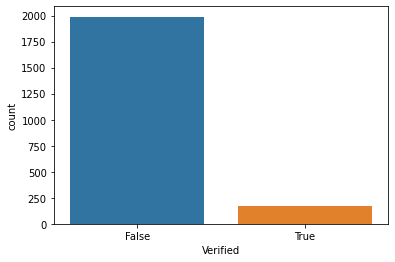

In [33]:
bar = sns.countplot(df['Verified'])

In [34]:
df['Verified'].value_counts()

False    1989
True      169
Name: Verified, dtype: int64

In [35]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

CNNnews18          14
TimesNow           13
IndiaToday         12
ANI                 7
TOIDelhi            5
                   ..
balaexpressTNIE     1
Swamy39             1
adeshguptabjp       1
AltNews             1
UmeshJadhav_BJP     1
Name: User, Length: 81, dtype: int64

In [36]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 180, 16: 295, 17: 353, 18: 341, 19: 374, 20: 367, 21: 248})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

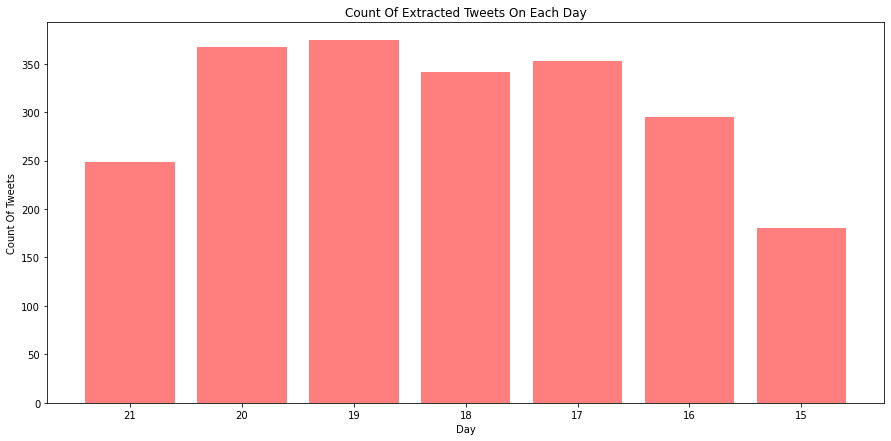

In [37]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [38]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 16,
         1: 40,
         2: 82,
         3: 70,
         4: 82,
         5: 100,
         6: 117,
         7: 120,
         8: 92,
         9: 114,
         10: 129,
         11: 134,
         12: 124,
         13: 183,
         14: 156,
         15: 110,
         16: 150,
         17: 128,
         18: 83,
         19: 61,
         20: 23,
         21: 17,
         22: 12,
         23: 15})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

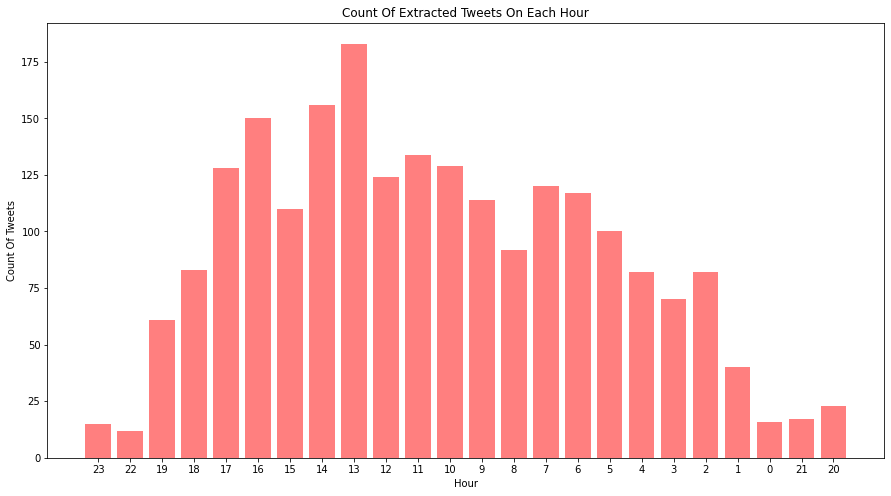

In [39]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [40]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['above', 'were', 'do', 'any', 'off', 'them', 'have', 'most', "didn't", 'between', 'during', 'where', 'down', "couldn't", "shan't", 'under', "don't", 'didn', 'if', 'am', 'is', 'about', 'its', 'been', 'more', 'needn', 'hers', "that'll", 'nor', 'their', "needn't", 'doing', 'your', 'whom', 'haven', 'because', 'both', 'yours', 'but', 'such', 'weren', 'she', 'yourself', 'theirs', 'from', 'had', 'our', 'couldn', 'shan', 'into', 'ourselves', 'each', 'here', 'did', "mustn't", 'yourselves', 'by', 'can', "it's", "doesn't", 'd', 'me', 'are', 'you', "won't", 'in', 'doesn', "haven't", 'ma', 'm', 'having', 'own', 'he', 'some', 'only', 'so', 'his', 'does', 'after', "aren't", "you'll", 'wouldn', 'very', 'the', 'at', 'we', 's', "should've", 'of', 'a', 'was', 'not', 'as', 'won', 'through', 'itself', 'they', 'until', 'it', 'against', 'no', "wasn't", 're', 'for', 'to', 'be', 'myself', 'who', 'him', 'too', 'below', 'and', 'now', "she's", 'hadn', 'o', 'aren', 'mustn', 'i', 'then', 'or', "isn't", 'with', 'fu

In [43]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0       inc rg know ppl luv bjp demo gdp unempcaa nrcd...
1       iit graduate cm delhi right ask write cbi upre...
2       bjp making huge corruption delhi mcd answers g...
3       declassify real age shahidafridi karachi akhan...
4       aap supporters iq bjp delhi leaders effort pub...
                              ...                        
2153                          gr strategic move bjp delhi
2154    ye twitter pe likhne se nhi hota hai congress ...
2155    breaking bjp deputy chief ministers bihar taar...
2156    harsh vardhan delhi cm candidate bjp give toug...
2157    horse mouth failed cm delhi ensure bjps win or...
Name: Processed_Tweet, Length: 2158, dtype: object

In [44]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0       [inc, rg, know, ppl, luv, bjp, demo, gdp, unem...
1       [iit, graduate, cm, delhi, right, ask, write, ...
2       [bjp, making, huge, corruption, delhi, mcd, an...
3       [declassify, real, age, shahidafridi, karachi,...
4       [aap, supporters, iq, bjp, delhi, leaders, eff...
                              ...                        
2153                    [gr, strategic, move, bjp, delhi]
2154    [ye, twitter, pe, likhne, se, nhi, hota, hai, ...
2155    [breaking, bjp, deputy, chief, ministers, biha...
2156    [harsh, vardhan, delhi, cm, candidate, bjp, gi...
2157    [horse, mouth, failed, cm, delhi, ensure, bjps...
Name: Processed_Tweet, Length: 2158, dtype: object

In [45]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0       [inc, rg, know, ppl, luv, bjp, demo, gdp, unem...
1       [iit, graduat, cm, delhi, right, ask, write, c...
2       [bjp, make, huge, corrupt, delhi, mcd, answer,...
3       [declassifi, real, age, shahidafridi, karachi,...
4       [aap, support, iq, bjp, delhi, leader, effort,...
                              ...                        
2153                      [gr, strateg, move, bjp, delhi]
2154    [ye, twitter, pe, likhn, se, nhi, hota, hai, c...
2155    [break, bjp, deputi, chief, minist, bihar, taa...
2156    [harsh, vardhan, delhi, cm, candid, bjp, give,...
2157    [hors, mouth, fail, cm, delhi, ensur, bjp, win...
Name: Processed_Tweet, Length: 2158, dtype: object

In [46]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 23:56:19,1330299033336864771,False,#INC+RG do not know ppl luv BJP \n#Demo+GDP+un...,MadanKandal3,"Shamla Hills, Bhopal",Twitter for Android,0,103,326,1,"[inc, know, ppl, luv, bjp, demo, gdp, unempcaa..."
1,2020-11-21 23:32:49,1330293118449627142,False,@UNTGAPS @varunsankineni @vivekvenkatswam @tea...,praveesh123,"Hnk, Warangal,Telangana, INDIA",Twitter Web App,2,58,2,0,"[iit, graduat, delhi, right, ask, write, cbi, ..."
2,2020-11-21 23:06:16,1330286436139069442,False,@praveesh123 @varunsankineni @vivekvenkatswam ...,UNTGAPS,Peaceful!,Twitter for Android,0,138,240,1,"[bjp, make, huge, corrupt, delhi, mcd, answer,..."
3,2020-11-21 22:07:38,1330271680636329987,False,@TimesNow @Dev_Fadnavis After that we will dec...,BhartiSahyog,"Mumbai, India",Twitter for iPhone,1,115,841,1,"[declassifi, real, age, shahidafridi, karachi,..."
4,2020-11-21 19:44:01,1330235539337981955,False,@Seems3r AAP supporters IQ and BJP Delhi leade...,abhinawp,India,Twitter for Android,0,2971,878,0,"[aap, support, bjp, delhi, leader, effort, pub..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2153,2020-11-15 10:40:44,1327924487568859136,False,"@navikakumar Gr8 strategic move by BJP, Delhi",2D1B10,,Twitter for iPhone,1,0,14,0,"[strateg, move, bjp, delhi]"
2154,2020-11-15 10:36:33,1327923436535025664,False,@Rita_Blogs @UturnSarkar @akhlaquequmar35 @sid...,JP4RAJ,"Jaipur, rajasthan",Twitter for Android,1,1635,1026,0,"[twitter, likhn, nhi, hota, hai, congress, vot..."
2155,2020-11-15 10:34:44,1327922979603316736,False,#BREAKING: BJP to have 2 Deputy Chief Minister...,GanatantraTimes,India,Twitter for Android,5,7,0,1,"[break, bjp, deputi, chief, minist, bihar, taa..."
2156,2020-11-15 10:19:15,1327919084499922944,False,Harsh Vardhan should be Delhi CM candidate fro...,Bharat_Putra,,Twitter for iPhone,5,8370,1565,2,"[harsh, vardhan, delhi, candid, bjp, give, tou..."


In [47]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

40039

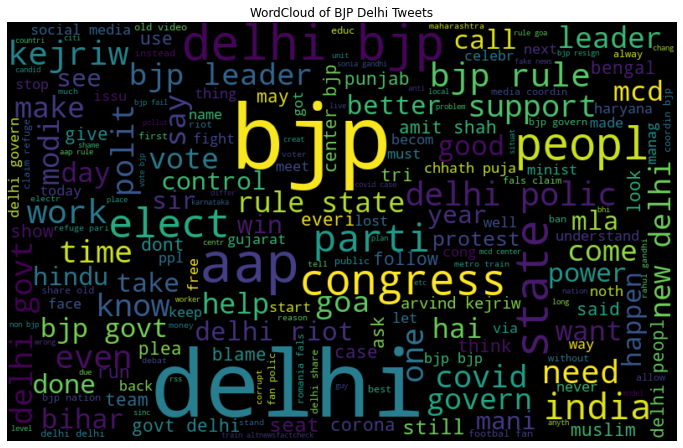

In [48]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of BJP Delhi Tweets")
plt.show()

In [49]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

2158

In [50]:
len(text)

40039

In [51]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 898
Negative Tweets: 454
Neutral Tweets 806


In [52]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [53]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [54]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.098,0.902,0.000,-0.5574
1,0.000,1.000,0.000,0.0000
2,0.000,0.850,0.150,0.3182
3,0.000,1.000,0.000,0.0000
4,0.134,0.597,0.269,0.4019
...,...,...,...,...
2153,0.000,1.000,0.000,0.0000
2154,0.000,0.856,0.144,0.4019
2155,0.000,1.000,0.000,0.0000
2156,0.355,0.645,0.000,-0.5267


In [55]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.098,0.902,0.000,-0.5574,Negative
1,0.000,1.000,0.000,0.0000,Neutral
2,0.000,0.850,0.150,0.3182,Positive
3,0.000,1.000,0.000,0.0000,Neutral
4,0.134,0.597,0.269,0.4019,Positive


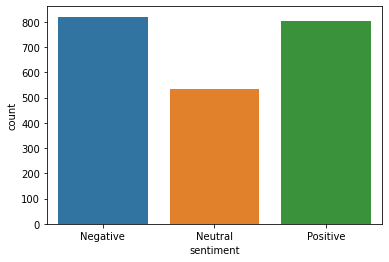

In [56]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [58]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Delhi/bjp_delhi.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

4105

In [59]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [61]:
word_emotion=dict()
for i in range(0,4105):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [ ]:
from numpy import nan
nan == nan


False

In [ ]:
for i in range(0,3346):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [ ]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

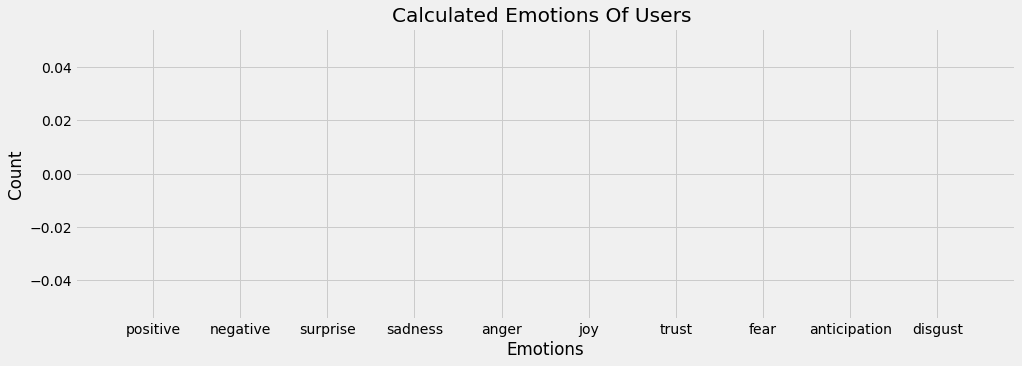

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [ ]:
df.Location  = df.Location.fillna('USA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [ ]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                     197
India                 61
New Delhi, India      18
Worldwide             14
Chandigarh, India     13
                    ... 
Arrakis                1
INDIA                  1
Hindustan              1
✨                      1
Phagwara, Punjab       1
Name: Location, Length: 205, dtype: int64

In [ ]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 23:17:54,1330289363549360128,False,@NarinderKaurAAP @BhagwantMann @AAPPunjab @Jar...,CrusaderSingh22,London,Twitter for iPhone,0,64,55,0,"[quit, shock, note, aap, continu, super, sprea...",London
1,2020-11-21 22:58:42,1330284530964570114,False,@Dubai_Indian_1 @TimesNow @Dev_Fadnavis Don't ...,mianmuhmmad1,"Lahore, Pakistan",Twitter for Android,4,88,276,0,"[angre, live, let, live, purani, lahor, darwaz...",Lahore
2,2020-11-21 21:53:53,1330268221220548615,False,AAP as party in delhi correct may be ! But In ...,GodyalNagaraj,"Andhra Pradesh,India",Twitter Web App,0,48,3239,0,"[aap, parti, delhi, correct, may, karnataka, h...",Andhra Pradesh
3,2020-11-21 20:18:17,1330244160499175427,False,@yudii222 @CMODelhi @ArvindKejriwal @Satyendar...,LAutreGarcon,"New Delhi, India",Twitter for Android,0,98,233,0,"[would, still, vote, aap, peopl, delhi, see, r...",New Delhi
4,2020-11-21 19:55:02,1330238309461872642,False,@ExSecular It’s almost the time AAP is going t...,SadanandSudeer,,Twitter for iPhone,2,53,225,0,"[almost, time, aap, come, conspiraci, theori, ...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,2020-11-15 12:38:24,1327954100827336704,False,@vijaythottathil @Riyadenny He just cheat us w...,jaison3012,"New Delhi, India",Twitter Web App,2,82,415,0,"[cheat, hidden, agenda, bjp, agentnext, elect,...",New Delhi
2112,2020-11-15 12:29:01,1327951741397069826,False,@Ch_AnilKumarINC Things were completely differ...,Amit_CH_INC,"New Delhi, India",Twitter for Android,0,2257,604,0,"[thing, complet, differ, congress, lead, delhi...",New Delhi
2113,2020-11-15 12:07:16,1327946267138224135,False,Rained 15 min in Delhi. God has his own ways o...,kannandelhi,India,Twitter for Android,6,850,985,0,"[rain, min, delhi, god, way, reduc, pollut, aa...",India
2114,2020-11-15 12:04:45,1327945633861300224,False,@DrVW30 I have great respecr for AAP cause of ...,jaha_mehta,,Twitter for Android,1,10,88,0,"[great, respecr, aap, caus, educ, develop, del...",


In [62]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [63]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,sentiment,day
0,2020-11-21 23:56:19,1330299033336864771,False,#INC+RG do not know ppl luv BJP \n#Demo+GDP+un...,MadanKandal3,"Shamla Hills, Bhopal",Twitter for Android,0,103,326,1,"[inc, know, ppl, luv, bjp, demo, gdp, unempcaa...",Negative,21
1,2020-11-21 23:32:49,1330293118449627142,False,@UNTGAPS @varunsankineni @vivekvenkatswam @tea...,praveesh123,"Hnk, Warangal,Telangana, INDIA",Twitter Web App,2,58,2,0,"[iit, graduat, delhi, right, ask, write, cbi, ...",Neutral,21
2,2020-11-21 23:06:16,1330286436139069442,False,@praveesh123 @varunsankineni @vivekvenkatswam ...,UNTGAPS,Peaceful!,Twitter for Android,0,138,240,1,"[bjp, make, huge, corrupt, delhi, mcd, answer,...",Positive,21
3,2020-11-21 22:07:38,1330271680636329987,False,@TimesNow @Dev_Fadnavis After that we will dec...,BhartiSahyog,"Mumbai, India",Twitter for iPhone,1,115,841,1,"[declassifi, real, age, shahidafridi, karachi,...",Neutral,21
4,2020-11-21 19:44:01,1330235539337981955,False,@Seems3r AAP supporters IQ and BJP Delhi leade...,abhinawp,India,Twitter for Android,0,2971,878,0,"[aap, support, bjp, delhi, leader, effort, pub...",Positive,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


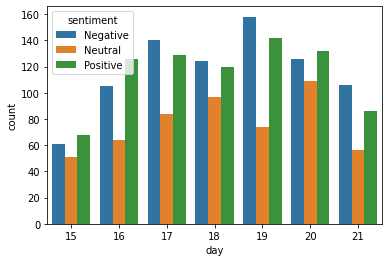

In [64]:
sns.countplot(df['day'],hue = df['sentiment'])

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [66]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,sentiment,day,sentiment_1
0,2020-11-21 23:56:19,1330299033336864771,False,#INC+RG do not know ppl luv BJP \n#Demo+GDP+un...,MadanKandal3,"Shamla Hills, Bhopal",Twitter for Android,0,103,326,1,"[inc, know, ppl, luv, bjp, demo, gdp, unempcaa...",Negative,21,0
1,2020-11-21 23:32:49,1330293118449627142,False,@UNTGAPS @varunsankineni @vivekvenkatswam @tea...,praveesh123,"Hnk, Warangal,Telangana, INDIA",Twitter Web App,2,58,2,0,"[iit, graduat, delhi, right, ask, write, cbi, ...",Neutral,21,1
2,2020-11-21 23:06:16,1330286436139069442,False,@praveesh123 @varunsankineni @vivekvenkatswam ...,UNTGAPS,Peaceful!,Twitter for Android,0,138,240,1,"[bjp, make, huge, corrupt, delhi, mcd, answer,...",Positive,21,2
3,2020-11-21 22:07:38,1330271680636329987,False,@TimesNow @Dev_Fadnavis After that we will dec...,BhartiSahyog,"Mumbai, India",Twitter for iPhone,1,115,841,1,"[declassifi, real, age, shahidafridi, karachi,...",Neutral,21,1
4,2020-11-21 19:44:01,1330235539337981955,False,@Seems3r AAP supporters IQ and BJP Delhi leade...,abhinawp,India,Twitter for Android,0,2971,878,0,"[aap, support, bjp, delhi, leader, effort, pub...",Positive,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,2020-11-15 10:40:44,1327924487568859136,False,"@navikakumar Gr8 strategic move by BJP, Delhi",2D1B10,,Twitter for iPhone,1,0,14,0,"[strateg, move, bjp, delhi]",Neutral,15,1
2154,2020-11-15 10:36:33,1327923436535025664,False,@Rita_Blogs @UturnSarkar @akhlaquequmar35 @sid...,JP4RAJ,"Jaipur, rajasthan",Twitter for Android,1,1635,1026,0,"[twitter, likhn, nhi, hota, hai, congress, vot...",Positive,15,2
2155,2020-11-15 10:34:44,1327922979603316736,False,#BREAKING: BJP to have 2 Deputy Chief Minister...,GanatantraTimes,India,Twitter for Android,5,7,0,1,"[break, bjp, deputi, chief, minist, bihar, taa...",Neutral,15,1
2156,2020-11-15 10:19:15,1327919084499922944,False,Harsh Vardhan should be Delhi CM candidate fro...,Bharat_Putra,,Twitter for iPhone,5,8370,1565,2,"[harsh, vardhan, delhi, candid, bjp, give, tou...",Negative,15,0


In [67]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [69]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [70]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [71]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.7160493827160493
Precision Score:  0.7160493827160493
Recall Score:  0.7160493827160493
F1 Score:  0.7160493827160493


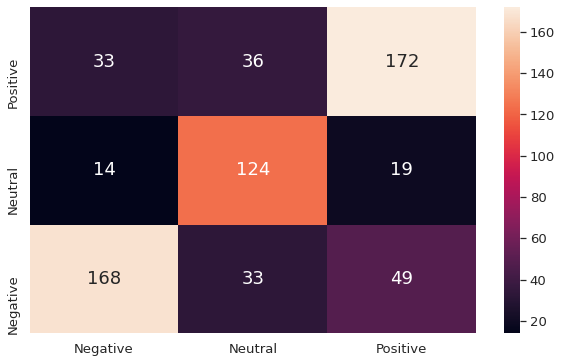

In [72]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [73]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [74]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [75]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.4807947019867549
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 9, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [76]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.48302469135802467
Precision Score:  0.48302469135802467
Recall Score:  0.48302469135802467
F1 Score:  0.4830246913580246


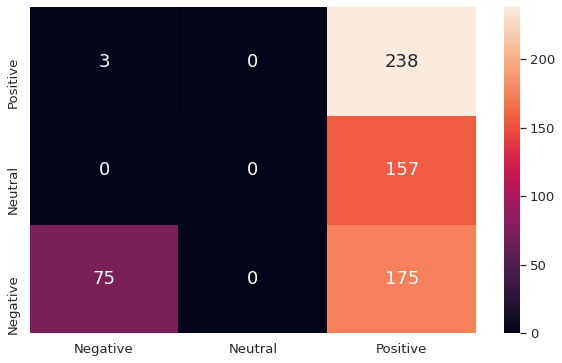

In [77]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [78]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [79]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.7654320987654321
Precision Score:  0.7654320987654321
Recall Score:  0.7654320987654321
F1 Score:  0.7654320987654321


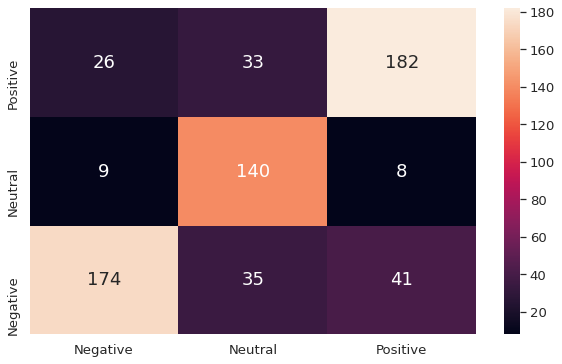

In [80]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [81]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [82]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, max_depth=16, criterion=entropy ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, max_depth=16, criterion=entropy, score=0.649, total=   5.3s
[CV] n_estimators=1200, max_depth=16, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=16, criterion=entropy, score=0.619, total=   5.3s
[CV] n_estimators=1200, max_depth=16, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.6s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=16, criterion=entropy, score=0.659, total=   5.2s
[CV] n_estimators=1200, max_depth=16, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.8s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=16, criterion=entropy, score=0.613, total=   5.2s
[CV] n_estimators=1200, max_depth=16, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.0s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=16, criterion=entropy, score=0.639, total=   5.2s
[CV] n_estimators=900, max_depth=7, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.2s remaining:    0.0s


[CV]  n_estimators=900, max_depth=7, criterion=gini, score=0.583, total=   2.5s
[CV] n_estimators=900, max_depth=7, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   28.7s remaining:    0.0s


[CV]  n_estimators=900, max_depth=7, criterion=gini, score=0.619, total=   2.4s
[CV] n_estimators=900, max_depth=7, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   31.1s remaining:    0.0s


[CV]  n_estimators=900, max_depth=7, criterion=gini, score=0.586, total=   2.5s
[CV] n_estimators=900, max_depth=7, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   33.6s remaining:    0.0s


[CV]  n_estimators=900, max_depth=7, criterion=gini, score=0.593, total=   2.5s
[CV] n_estimators=900, max_depth=7, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   36.1s remaining:    0.0s


[CV]  n_estimators=900, max_depth=7, criterion=gini, score=0.613, total=   2.5s
[CV] n_estimators=200, max_depth=4, criterion=gini ...................
[CV]  n_estimators=200, max_depth=4, criterion=gini, score=0.576, total=   0.4s
[CV] n_estimators=200, max_depth=4, criterion=gini ...................
[CV]  n_estimators=200, max_depth=4, criterion=gini, score=0.579, total=   0.4s
[CV] n_estimators=200, max_depth=4, criterion=gini ...................
[CV]  n_estimators=200, max_depth=4, criterion=gini, score=0.546, total=   0.4s
[CV] n_estimators=200, max_depth=4, criterion=gini ...................
[CV]  n_estimators=200, max_depth=4, criterion=gini, score=0.553, total=   0.4s
[CV] n_estimators=200, max_depth=4, criterion=gini ...................
[CV]  n_estimators=200, max_depth=4, criterion=gini, score=0.586, total=   0.4s
[CV] n_estimators=200, max_depth=17, criterion=entropy ...............
[CV]  n_estimators=200, max_depth=17, criterion=entropy, score=0.636, total=   0.9s
[CV] n_est

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


0.6483443708609271
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 18, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [83]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.6496913580246914
Precision Score:  0.6496913580246914
Recall Score:  0.6496913580246914
F1 Score:  0.6496913580246914


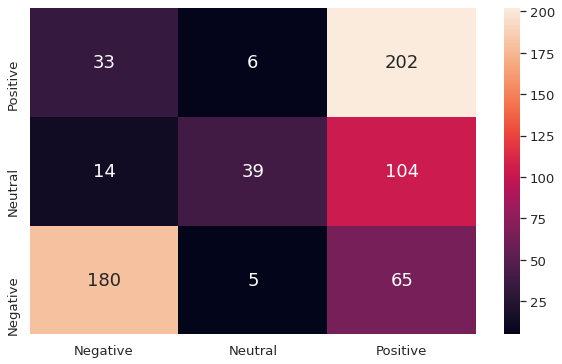

In [84]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [85]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.683641975308642
Precision Score:  0.683641975308642
Recall Score:  0.683641975308642
F1 Score:  0.683641975308642


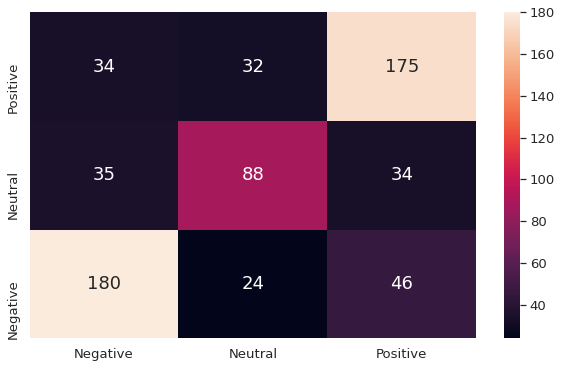

In [86]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [87]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [88]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.6589403973509933
{'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [89]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.683641975308642
Precision Score:  0.683641975308642
Recall Score:  0.683641975308642
F1 Score:  0.683641975308642


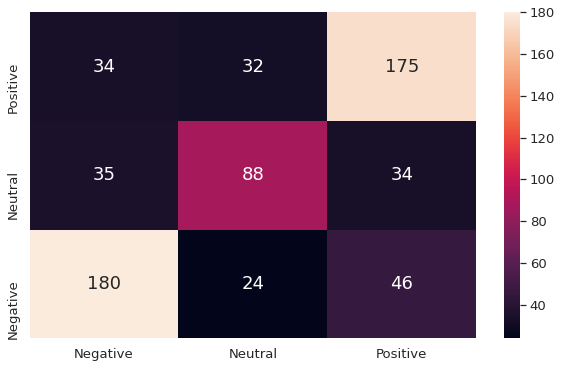

In [90]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

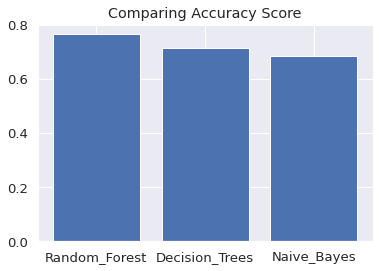

In [91]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

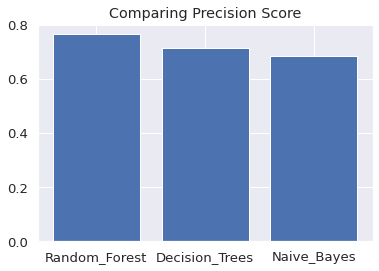

In [92]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

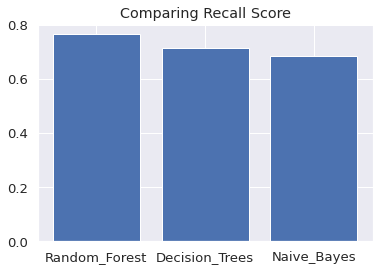

In [93]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

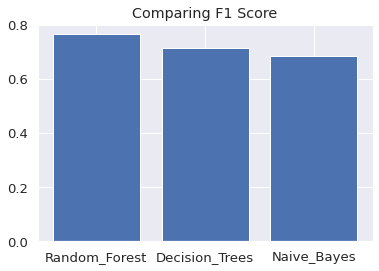

In [94]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()